# Практическая работа №1: Краевая задача для уравнения II-го порядка
Выполнил студент гр. 9382 Кодуков Александр, вариант 25.

## Цель работы
Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения
Задача Коши:

задача поиска частного решения системы уравнений
$$
\begin{cases}
f(x, y, y', y'', ...y^{(n)}) = 0\\
y(x_0) = y_0\\
y'(x_0) = y_1\\
y''(x_0) = y_2\\
...\\
y^{(n-1)}(x_0) = y_{n-1}
\end{cases}
$$
## Постановка задачи
Дано дифференциальное уравнение:

$y'' = f(x, y), a < x < b$ (1)

и граничные условия

$y(a) = y_a, y(b) = y_b$. (2)

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a) = y_a, y'(a) = h$. (3)

План решения основан на многократном решении задачи Коши (1), (3).
Значение решения задачи Коши при $x = b$ является функцией от $h$.

Задача сводится к отысканию такого значения переменной $h$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b, h) = y_b$. (4)

Это уравнение с одним неизвестным $h$.
Для его решения можно применить стандартный метод половинного деления.
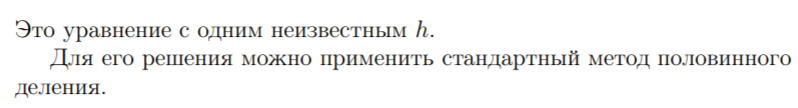
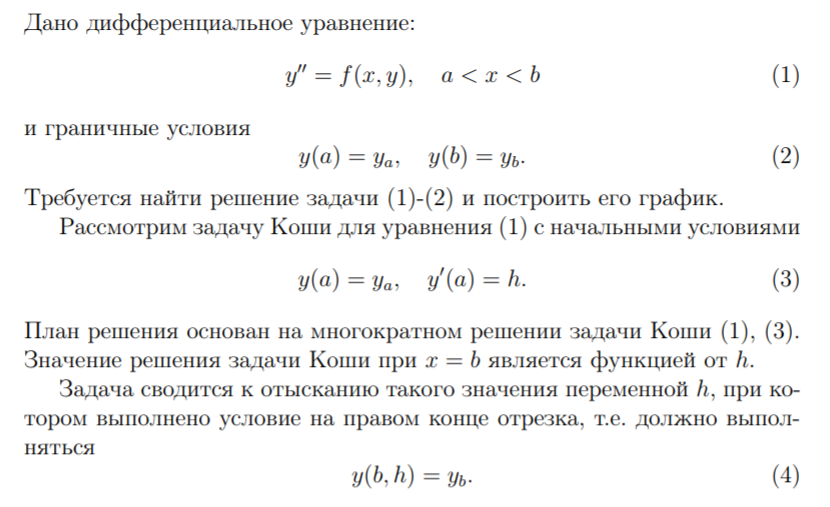

## Выполнение работы

Условия, 25 вариант:

$a = 0, b = 2$

$y'' = f(x, y) = tg(x / 2)^2 + y^2, 0 < x < 2$

$y(0) = 1, y(2) = 2$

$y'(a) = h_0 = -5$ (взято наугад)

1) Задаем $h_0$, решаем задачу Коши, считаем $y(b, h_0)$

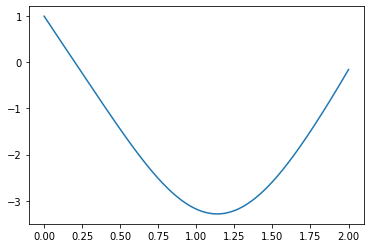

y(b, h) = -0.1556213444166864


In [13]:
from scipy import integrate 
import numpy as np
import matplotlib.pyplot as plt

a = 0.
b = 2.
y_a = 1.
y_b = 2.

step = 0.001
h_0 = -5.

# f(x, y) = tg(x / 2)^2 + y^2
def dy2(Y, t):
    return [Y[1], np.tan(t / 2) ** 2 + Y[0] ** 2]

sol = integrate.odeint(dy2, [y_a, h_0], np.arange(a, b, step))
y_last = sol[-1, 0]

x = np.linspace(a, b, int(float(b - a) / step)).tolist()
p = plt.plot(x, sol[:, 0])
plt.show()
print("y(b, h) =", y_last)

Получили значение меньше $y_b = 2$

2) Выберем шаг $\Delta h = 0.5$ и будем повторять предыдущий шаг, пока $y(b, h_m)$ не перейдет $y_b$

In [17]:
h_0 = -5
dh = 0.5
y_cur = y_last

while np.sign(y_b - y_last) == np.sign(y_b - y_cur):
  h_0 += dh
  sol = integrate.odeint(dy2, [y_a, h_0], np.arange(a, b, step))
  y_last = y_cur
  y_cur = sol[-1, 0]


print(np.fmin(h_0, h_0 - dh), "< h <", np.fmax(h_0, h_0 - dh))

-1.0 < h < -0.5


3) Определяем нужное $h$ бинарным поиском с остановкой при $|y(b, h_m)-y(b, h_m-1)| < 0.001$ или после 100 шагов

steps: 12
h: -0.5718994140625
y(b, h): 2.000286223651498


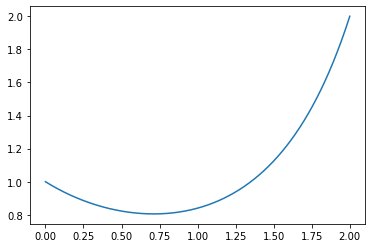

In [18]:
h_l = np.fmin(h_0, h_0 - dh)
h_r = np.fmax(h_0, h_0 - dh)
if h_l == h_0 - dh:
  y_l = y_last
  y_r = y_cur
else:
  y_l = y_cur
  y_r = y_last

steps = 0
diff = 1
y_med = 0

while steps < 100 and diff > 0.001:
  h_med = h_l + (h_r - h_l) / 2
  sol = integrate.odeint(dy2, [y_a, h_med], np.arange(a, b, step))
  y_med = sol[-1, 0]

  if np.sign(y_b - y_l) == np.sign(y_b - y_med):
    y_l = y_med
    h_l = h_med
  else:
    y_r = y_med
    h_r = h_med
  diff = np.fabs(y_l - y_r)
  steps += 1

print("steps:", steps)
print("h:", h_med)
print("y(b, h):", y_med)

p = plt.plot(x, sol[:, 0])
plt.show()


## Вывод
В ходе работы был рассмотрен на практике способ решения краевой задачи 2-го порядка путем многократного решения задачи Коши. Метод производит большое количество вычислений, но может оказаться удобен в случаях, когда сложно проинтегрировать уравнение аналитически и приемлема погрешность.